In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Bulding ANN
import tensorflow as tf
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'xgboost'

In [2]:
data= pd.read_csv('advertisements-Data.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [12]:
data = data.rename(columns={"Male": "Gender"})
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [14]:
nbr_Duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {nbr_Duplicates}")

Number of duplicate rows: 0


In [15]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [22]:
click_counts = data['Clicked on Ad'].value_counts()
print(click_counts)

Clicked on Ad
0    500
1    500
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Clicked on Ad')

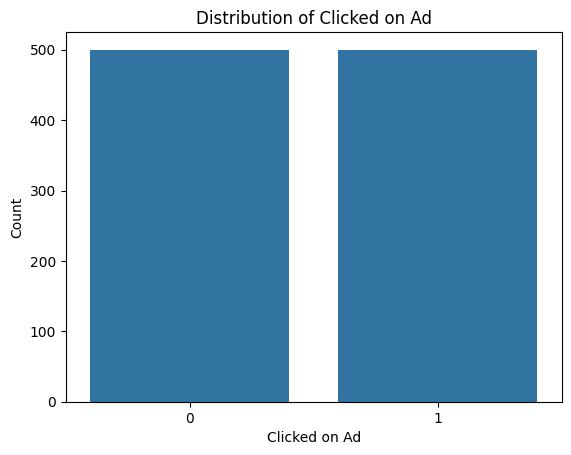

In [23]:
sns.countplot(x='Clicked on Ad', data=data)
plt.xlabel('Clicked on Ad')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad')

In [24]:
print(data.columns)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


In [25]:
X= data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis=1)
Y= data['Clicked on Ad']

In [27]:
X.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1


In [29]:
X.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012
Gender,-0.018951,-0.021044,0.001322,0.028012,1.000000


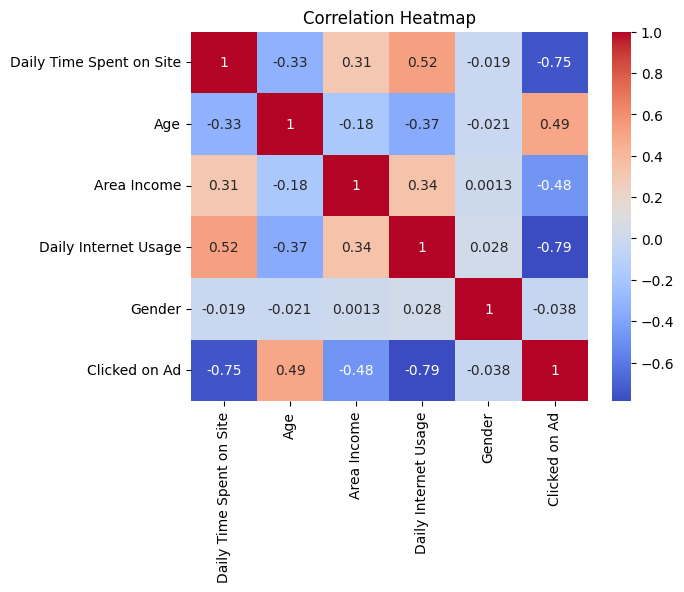

In [30]:
data_corr = data.select_dtypes(include=[np.number])
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)


In [51]:
from sklearn.preprocessing import MinMaxScaler
# Création du scaler
mmscaler = MinMaxScaler()

# Ajustement sur X_train et transformation
X_train_minmax = mmscaler.fit_transform(X_train)
X_test_minmax = mmscaler.transform(X_test)
# Vérification des formes
print("X_train_minmax shape:", X_train_minmax.shape)
print("X_test_minmax shape:", X_test_minmax.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train_minmax shape: (700, 5)
X_test_minmax shape: (300, 5)
Y_train shape: (700,)
Y_test shape: (300,)


MODEL SELECTION 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Modèle
Lr = LogisticRegression()
Lr.fit(X_train, Y_train)

# Prédictions
y_pred_Lr = Lr.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_Lr))

# Matrice de confusion
CFM_Lr = confusion_matrix(Y_test, y_pred_Lr)
print("Confusion Matrix for Logistic Regression:\n", CFM_Lr)

# Extraction TN, FP, FN, TP
TN, FP, FN, TP = CFM_Lr.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


Logistic Regression Accuracy: 0.9
Confusion Matrix for Logistic Regression:
 [[139  11]
 [ 19 131]]
True Negatives (TN): 139
False Positives (FP): 11
False Negatives (FN): 19
True Positives (TP): 131


In [55]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)
y_pred_SVM = SVM.predict(X_train)
print("SVM Accuracy:", accuracy_score(Y_train, y_pred_SVM))
y_pred_SVM_test = SVM.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(Y_test, y_pred_SVM_test))

SVM Accuracy: 0.97
SVM Test Accuracy: 0.9766666666666667


In [63]:
KNN= KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, Y_train)
y_pred_KNN = KNN.predict(X_train)
print("KNN Accuracy:", accuracy_score(Y_train, y_pred_KNN))
y_pred_KNN_test = KNN.predict(X_test)
print("Confusion Matrix for Logistic Regression:\n", CFM_Lr)

# Extraction TN, FP, FN, TP
TN, FP, FN, TP = CFM_Lr.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


KNN Accuracy: 0.8742857142857143
Confusion Matrix for Logistic Regression:
 [[139  11]
 [ 19 131]]
True Negatives (TN): 139
False Positives (FP): 11
False Negatives (FN): 19
True Positives (TP): 131


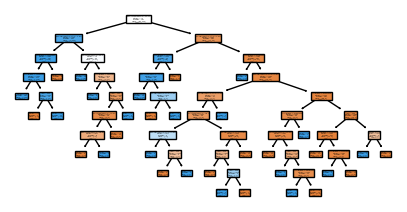

In [ ]:
# 6.4 Decision Tree Classifier
DT = DecisionTreeClassifier(criterion="entropy", random_state=0)
DT.fit(X_train, Y_train)
y_pred_DT = DT.predict(X_train)

CFM_DT = confusion_matrix(Y_train, y_pred_DT)
TN, FP, FN, TP = CFM_DT.ravel()

Sen_DT = TP / (TP + FN)
Spec_DT = TN / (TN + FP)

from sklearn.tree import plot_tree
plt.figure(figsize=(5, 2.5))
plot_tree(DT, filled=True, feature_names=X.columns, 
          class_names=Y.unique().astype(str))
plt.show()

# Output: [Decision tree visualization]




In [65]:
RF = RandomForestClassifier(
    n_estimators=100,      # number of trees
    n_jobs=-1,             # use all CPU cores
    bootstrap=True,        # sampling with replacement
    min_samples_leaf=100,  # minimum samples per leaf
    oob_score=True,        # out-of-bag score
    random_state=42
)

# Train model
RF.fit(X_train, Y_train)

# Predictions
y_pred_RF_train = RF.predict(X_train)
y_pred_RF_test = RF.predict(X_test)

# Accuracy
print("Random Forest Accuracy (train):", accuracy_score(Y_train, y_pred_RF_train))
print("Random Forest Accuracy (test):", accuracy_score(Y_test, y_pred_RF_test))

# Out-of-bag score (only valid when bootstrap=True)
print("OOB Score:", RF.oob_score_)

# Confusion Matrix
CFM_RF = confusion_matrix(Y_test, y_pred_RF_test)
print("Confusion Matrix for Random Forest:\n", CFM_RF)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = CFM_RF.ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Extra metrics
precision = precision_score(Y_test, y_pred_RF_test)
recall = recall_score(Y_test, y_pred_RF_test)
f1 = f1_score(Y_test, y_pred_RF_test)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Random Forest Accuracy (train): 0.9528571428571428
Random Forest Accuracy (test): 0.95
OOB Score: 0.9328571428571428
Confusion Matrix for Random Forest:
 [[142   8]
 [  7 143]]
True Negatives (TN): 142
False Positives (FP): 8
False Negatives (FN): 7
True Positives (TP): 143
Precision: 0.95
Recall: 0.95
F1-Score: 0.95


In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# XGBoost Classifier
XGB = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train model
XGB.fit(X_train, Y_train)

# Predictions
y_pred_XGB_train = XGB.predict(X_train)
y_pred_XGB_test = XGB.predict(X_test)

# Accuracy
print("XGBoost Accuracy (train):", accuracy_score(Y_train, y_pred_XGB_train))
print("XGBoost Accuracy (test):", accuracy_score(Y_test, y_pred_XGB_test))

# Confusion Matrix
CFM_XGB = confusion_matrix(Y_test, y_pred_XGB_test)
print("Confusion Matrix for XGBoost:\n", CFM_XGB)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = CFM_XGB.ravel()
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

# Extra metrics
precision = precision_score(Y_test, y_pred_XGB_test)
recall = recall_score(Y_test, y_pred_XGB_test)
f1 = f1_score(Y_test, y_pred_XGB_test)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


ModuleNotFoundError: No module named 'xgboost'